# What skills, tools and credentials are essential to break into data science - according to Kaggle's 2020 survey

### Imports

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
import matplotlib #to see what version I have

In [194]:
print('pandas version: ', pd.__version__)
print('matplotlib version: ', matplotlib.__version__)
print('seaborn version', sns.__version__)

pandas version:  0.25.1
matplotlib version:  3.0.3
seaborn version 0.9.0


### Functions I use over and over

In [195]:
def plot_value_counts(val_counts, title, x_label, y_label="Number of Occurences", pct=False, save=False):
    """
    Plot the number of occurences per item
    
    inputs
    val_counts -- a pandas series containing index and count
    title -- the title of the plot you are making
    x_label -- the label of the horizontal axis
    y_label -- the label of the vertical axis
    pct -- False if displaying a count, True if displaying a percentage
    save -- False if not saving plot, True if you would like to save the plot
    """
    plt.figure(figsize=(8,6))
    ax = sns.barplot(val_counts.index, val_counts.values, alpha=0.8)
    plt.title(title)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)

    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
        )

    for p in ax.patches:
        x_center = p.get_x() + (p.get_width() / 5)
        y = p.get_height()
        if pct:
            ax.annotate(str(p.get_height()), (x_center, y))
        else:
            ax.annotate(str(int(p.get_height())), (x_center, y))
        

    if save:
        plt.savefig(title, bbox_inches = "tight")
        
    plt.show()
    
    
def pull_columns_of_interest(question):
    """
    Several questions have multiple columns associated with them. This function will find all of the columns 
    associated with a particular question, and return a series containing the number of not NaN's of each column.
    
    question -- the question asked by the survey. 
    
    returns
    val_counts -- a series containing the number of not NaN values per column
    """
    
    columns_of_interest = []
    for col in survey.columns:
        if question in survey.loc[0, col]:
            columns_of_interest.append(col)
            
    df = data_scientists[columns_of_interest]
    
    new_index_map = {}
    for col in df.columns:
        print(col + ' = ' + df[col].mode()[0])
        new_index_map[col] = df[col].mode()[0]
        
    
    
    """
    The question was a select all that apply question, so NaN indicates that the survey taker did not check a 
    particular language. The number of non-null objects in each column is the number of respondents who selected 
    a particular choice that they agree with or use.
    """
    val_counts = df.notna().sum()

    
    val_counts = val_counts.rename(new_index_map).sort_values(ascending=False)
        
    return val_counts

In [196]:
survey = pd.read_csv('kaggle-survey-2020/kaggle_survey_2020_responses.csv')

In [197]:
survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
#how many respondents?
print('Total number of respondents: ', survey.shape[0])

Total number of respondents:  20037


In [199]:
#In which country do you reside?
countries = survey.Q3.value_counts()
len(countries)

56

In [200]:
len(countries.drop('In which country do you currently reside?'))

55

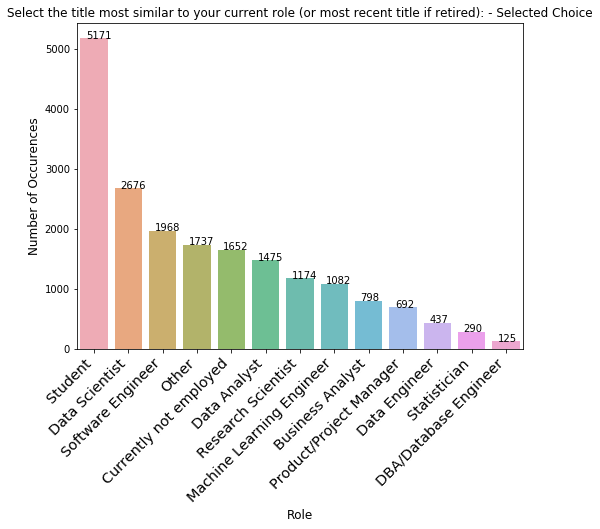

In [201]:
role_counts = survey['Q5'].value_counts()[:-1]

question = survey.loc[0, 'Q5']

plot_value_counts(role_counts, question, 'Role', save=True)


We are interested into breaking into data science. I will split the take a subset of the data that only includes indivduals who claim thier current role is data science. 

In [202]:
data_scientists = survey[survey['Q5']=='Data Scientist']
print('number of data scientists in survey: ', data_scientists.shape[0])
data_scientists.head()

number of data scientists in survey:  2676


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,874,30-34,Man,Russia,Bachelor’s degree,Data Scientist,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,983,22-24,Man,Indonesia,Master’s degree,Data Scientist,3-5 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,664,18-21,Man,India,Bachelor’s degree,Data Scientist,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to break into the field... I'm about to graduate my undergaduate program. Do I need to get a Masters?

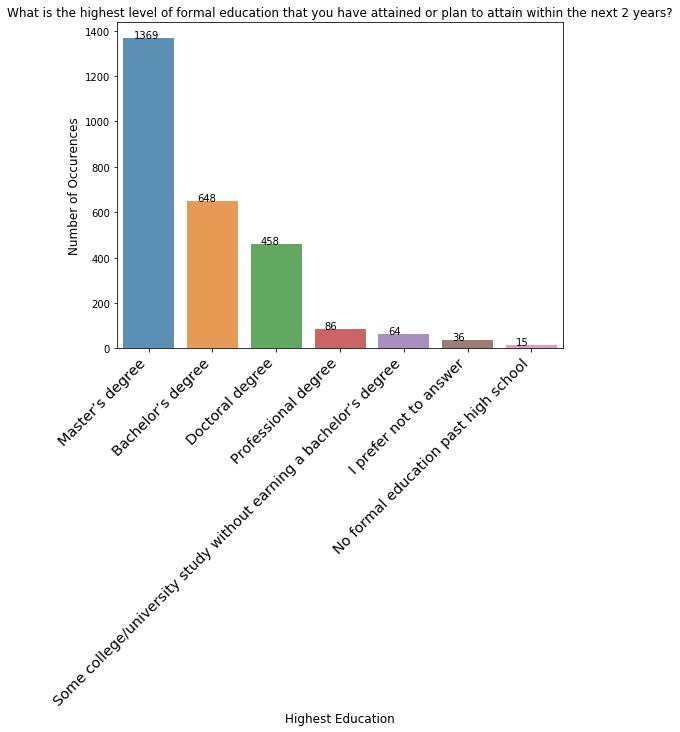

In [203]:
education = data_scientists.Q4.value_counts()

question = survey.loc[0, 'Q4']

plot_value_counts(education, question, 'Highest Education',save=True)

In [204]:
print('pct of data scientists with: ')
for i, v in education.items():
    print(f'\t{i} : {round(v/data_scientists.shape[0], 2)}')

pct of data scientists with: 
	Master’s degree : 0.51
	Bachelor’s degree : 0.24
	Doctoral degree : 0.17
	Professional degree : 0.03
	Some college/university study without earning a bachelor’s degree : 0.02
	I prefer not to answer : 0.01
	No formal education past high school : 0.01


What tools are being used?

<br>

What programming languages do data scientists use on a regular basis?

In [205]:
language_counts = pull_columns_of_interest('What programming languages do you use on a regular basis?')

Q7_Part_1 = Python
Q7_Part_2 = R
Q7_Part_3 = SQL
Q7_Part_4 = C
Q7_Part_5 = C++
Q7_Part_6 = Java
Q7_Part_7 = Javascript
Q7_Part_8 = Julia
Q7_Part_9 = Swift
Q7_Part_10 = Bash
Q7_Part_11 = MATLAB
Q7_Part_12 = None
Q7_OTHER = Other


In [206]:
language_counts

Python        2453
SQL           1473
R              975
Bash           405
C++            323
Java           305
Javascript     290
C              247
Other          245
MATLAB         242
Julia           71
Swift           14
None             5
dtype: int64

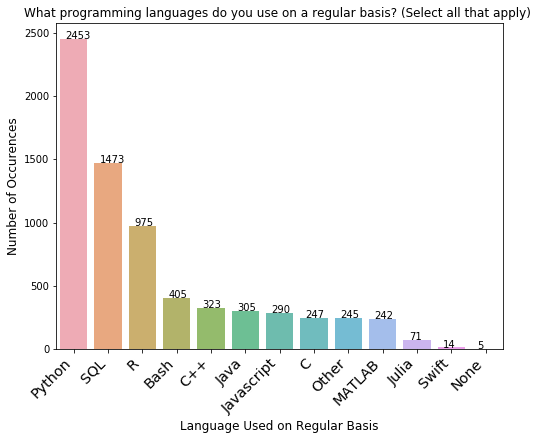

In [207]:
question = survey.loc[0, 'Q7_Part_1'].split('- Selected Choice -')[0]

plot_value_counts(language_counts, question, 'Language Used on Regular Basis', save=True)

In [208]:
# average number of languages used by data scienists on a regular basis
print('average number of languages used per data scientist: ', 
      language_counts.drop('None').sum()/data_scientists.shape[0])

average number of languages used per data scientist:  2.631913303437967


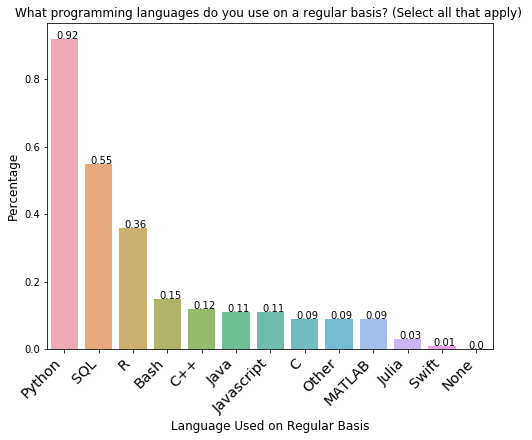

In [209]:
pct = (language_counts / data_scientists.shape[0]).round(2)

plot_value_counts(pct, question, 'Language Used on Regular Basis', 'Percentage', pct=True)

92% of data scientist use Python on a regular basis! If you're in a hurry to break into the field, focus most of your efforts on learning Python. But don't stop there! On average, data scientists use 2.6 programming languages on a regular basis.

What programming language would you recommend an aspiring data scientist to learn first?

In [210]:
recommened_languages = data_scientists['Q8'].value_counts()

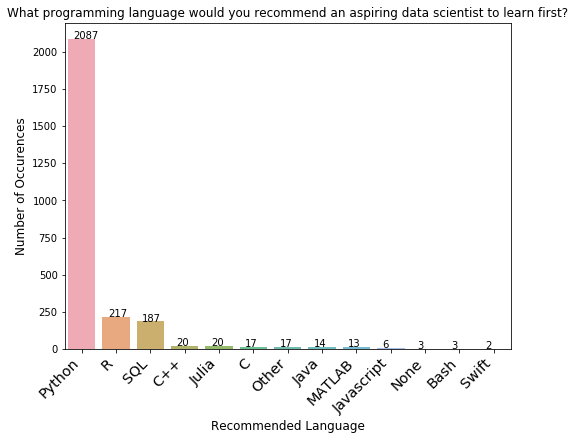

In [211]:
plot_value_counts(recommened_languages, 
                  'What programming language would you recommend an aspiring data scientist to learn first?', 
                  'Recommended Language')

Python it is!!

<br>

Speaking of learning, On which platforms have you begun or completed data science courses?

In [212]:
platform_counts = pull_columns_of_interest(
    'On which platforms have you begun or completed data science courses?'
    )

Q37_Part_1 = Coursera
Q37_Part_2 = edX
Q37_Part_3 = Kaggle Learn Courses
Q37_Part_4 = DataCamp
Q37_Part_5 = Fast.ai
Q37_Part_6 = Udacity
Q37_Part_7 = Udemy
Q37_Part_8 = LinkedIn Learning
Q37_Part_9 = Cloud-certification programs (direct from AWS, Azure, GCP, or similar)
Q37_Part_10 = University Courses (resulting in a university degree)
Q37_Part_11 = None
Q37_OTHER = Other


In [213]:
platform_counts

Coursera                                                                  1410
Udemy                                                                      777
University Courses (resulting in a university degree)                      689
Kaggle Learn Courses                                                       675
DataCamp                                                                   663
edX                                                                        500
Udacity                                                                    428
LinkedIn Learning                                                          276
Fast.ai                                                                    264
Other                                                                      222
Cloud-certification programs (direct from AWS, Azure, GCP, or similar)     203
None                                                                       165
dtype: int64

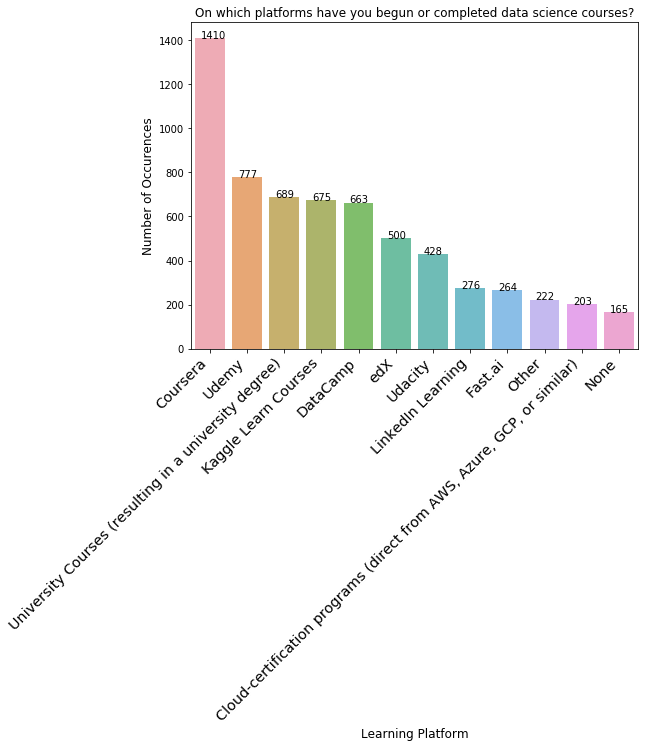

In [214]:
plot_value_counts(platform_counts, 'On which platforms have you begun or completed data science courses?',
                 'Learning Platform', save=True)

In [215]:
#average number of platforms...
print('number of platforms used: ',platform_counts.drop('None').sum())
print('average number of platforms used: ', platform_counts.drop('None').sum()/data_scientists.shape[0])
print('pct of data scientist who do not use any online learning platform: ', 
      platform_counts['None']/data_scientists.shape[0])

number of platforms used:  6107
average number of platforms used:  2.282137518684604
pct of data scientist who do not use any online learning platform:  0.061659192825112105


Interesting. Coursera seems to be clear favorite. I thought Kaggle Learn courses would be higher, given that the 
survey was conducted through Kaggle. 


We know a Bachelor's degree is important. An even more advanced degree seems to be helpful, but does not seem to be required.

We know we need to learn Python and SQL. We know that more data scientists use Coursera than any other platform... 

But going beyond language, what activities and tasks should we get good at...

Thankfully, Kaggle asked:

Select any activities that make up an important part of your role at work


We can use the answers to this question to get an even better understanding of what we should be practicing.

In [216]:
activities_count = pull_columns_of_interest(
    'Select any activities that make up an important part of your role at work'
    )

Q23_Part_1 = Analyze and understand data to influence product or business decisions
Q23_Part_2 = Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
Q23_Part_3 = Build prototypes to explore applying machine learning to new areas
Q23_Part_4 = Build and/or run a machine learning service that operationally improves my product or workflows
Q23_Part_5 = Experimentation and iteration to improve existing ML models
Q23_Part_6 = Do research that advances the state of the art of machine learning
Q23_Part_7 = None of these activities are an important part of my role at work
Q23_OTHER = Other


In [217]:
activities_count

Analyze and understand data to influence product or business decisions                                              1872
Build prototypes to explore applying machine learning to new areas                                                  1452
Experimentation and iteration to improve existing ML models                                                         1194
Build and/or run a machine learning service that operationally improves my product or workflows                     1057
Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data     946
Do research that advances the state of the art of machine learning                                                   634
Other                                                                                                                 88
None of these activities are an important part of my role at work                                                     74
dtype: int64

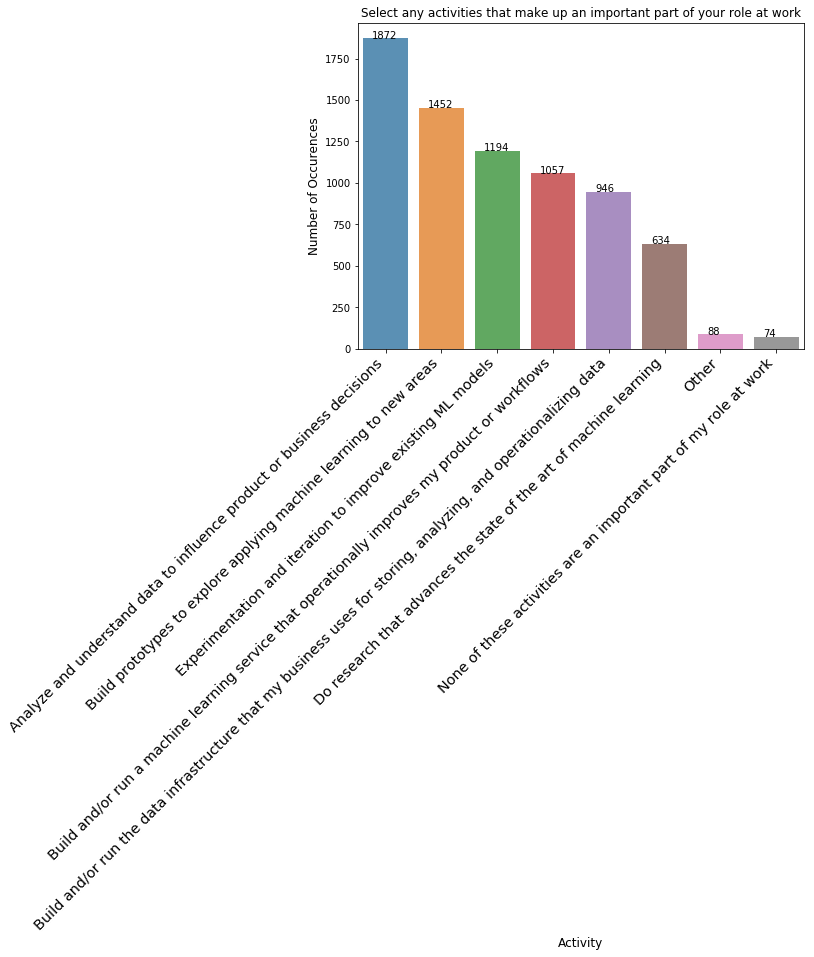

In [218]:
plot_value_counts(activities_count,'Select any activities that make up an important part of your role at work',
                 'Activity')

Based on the results above, it seems that for most of the data scientists who completed the survey, two large portions of their work are:
* Analysis
* Machine Learning

For analysis, I'm interesting in looking at the following questions:

* Which of the following integrated development environments (IDE's) do you use on a regular basis?
* Which of the following hosted notebook products do you use on a regular basis?
* What is the primary tool that you use at work or school to analyze data?
* What data visualization libraries or tools do you use on a regular basis?


For ML, I'm interested in looking at the following questions:
* Which of the following machine learning frameworks do you use on a regular basis?
* Which of the following ML algorithms do you use on a regular basis?
* Does your current employer incorporate machine learning methods into their business?
* Do you use any of the following machine learning products on a regular basis?

In [219]:
#What IDE's do you use on a regular basis?
ide_counts = pull_columns_of_interest(
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?")

Q9_Part_1 = Jupyter (JupyterLab, Jupyter Notebooks, etc) 
Q9_Part_2 =  RStudio 
Q9_Part_3 = Visual Studio
Q9_Part_4 = Visual Studio Code (VSCode)
Q9_Part_5 =  PyCharm 
Q9_Part_6 =   Spyder  
Q9_Part_7 =   Notepad++  
Q9_Part_8 =   Sublime Text  
Q9_Part_9 =   Vim / Emacs  
Q9_Part_10 =  MATLAB 
Q9_Part_11 = None
Q9_OTHER = Other


In [220]:
ide_counts

Jupyter (JupyterLab, Jupyter Notebooks, etc)     1918
Visual Studio Code (VSCode)                       860
 PyCharm                                          825
 RStudio                                          814
  Spyder                                          564
  Notepad++                                       504
  Sublime Text                                    393
  Vim / Emacs                                     285
Visual Studio                                     262
 MATLAB                                           151
Other                                             146
None                                               17
dtype: int64

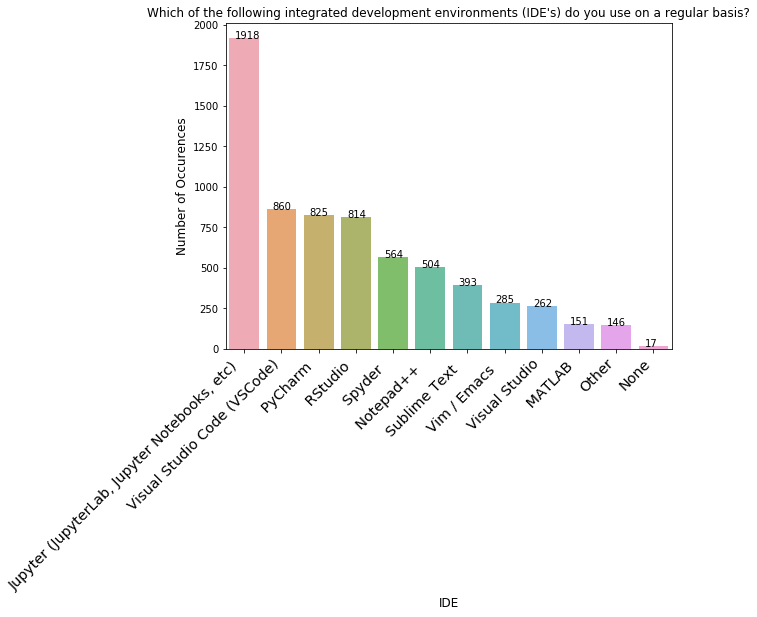

In [221]:
plot_value_counts(ide_counts, 
                  "Which of the following integrated development environments (IDE's) do you use on a regular basis?", 
                  'IDE')

In [222]:
#What notebooks do you use?
notebook_counts = pull_columns_of_interest(
    "Which of the following hosted notebook products do you use on a regular basis?")

Q10_Part_1 =  Kaggle Notebooks
Q10_Part_2 = Colab Notebooks
Q10_Part_3 = Azure Notebooks
Q10_Part_4 =  Paperspace / Gradient 
Q10_Part_5 =  Binder / JupyterHub 
Q10_Part_6 =  Code Ocean 
Q10_Part_7 =  IBM Watson Studio 
Q10_Part_8 =  Amazon Sagemaker Studio 
Q10_Part_9 =  Amazon EMR Notebooks 
Q10_Part_10 = Google Cloud AI Platform Notebooks 
Q10_Part_11 = Google Cloud Datalab Notebooks
Q10_Part_12 =  Databricks Collaborative Notebooks 
Q10_Part_13 = None
Q10_OTHER = Other


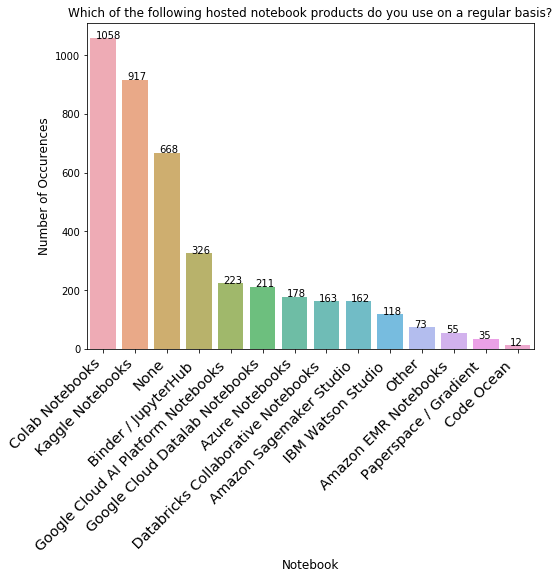

In [223]:
plot_value_counts(notebook_counts, "Which of the following hosted notebook products do you use on a regular basis?",
                 "Notebook")

In [224]:
#Primary analysis tool
analysis_tools_count = pull_columns_of_interest(
    "What is the primary tool that you use at work or school to analyze data?")

Q38 = Local development environments (RStudio, JupyterLab, etc.)


In [225]:
for col in survey.columns:
    if "What is the primary tool that you use at work or school to analyze data?" in survey.loc[0, col]:
        print(col)

Q38


In [226]:
tool_counts = data_scientists['Q38'].value_counts()
tool_counts

Local development environments (RStudio, JupyterLab, etc.)              1386
Basic statistical software (Microsoft Excel, Google Sheets, etc.)        291
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                 173
Advanced statistical software (SPSS, SAS, etc.)                          137
Other                                                                    106
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     104
Name: Q38, dtype: int64

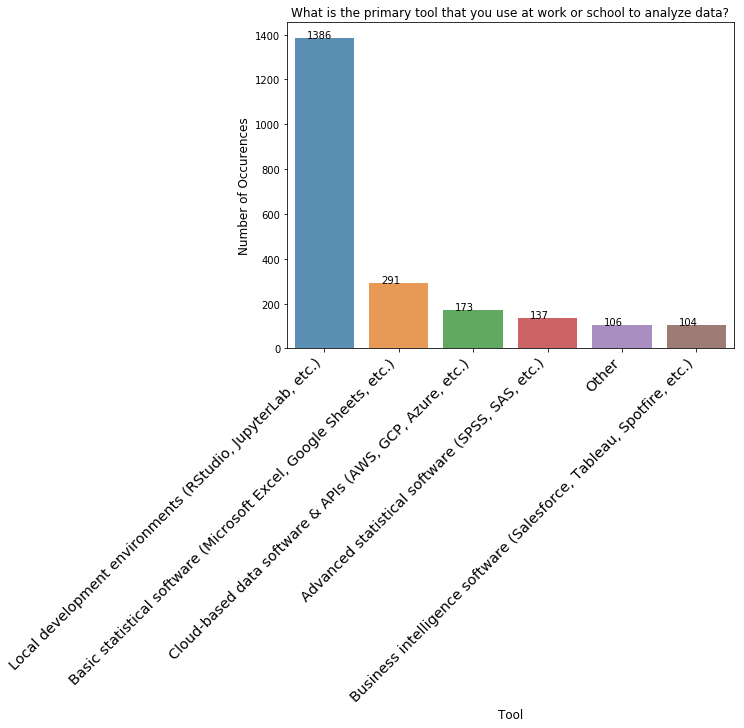

In [227]:
plot_value_counts(tool_counts, "What is the primary tool that you use at work or school to analyze data?",
                 "Tool")

In [228]:
#What visualization tools do you use on a regular basis?
viz_tools_count = pull_columns_of_interest(
    "What data visualization libraries or tools do you use on a regular basis?")

Q14_Part_1 =  Matplotlib 
Q14_Part_2 =  Seaborn 
Q14_Part_3 =  Plotly / Plotly Express 
Q14_Part_4 =  Ggplot / ggplot2 
Q14_Part_5 =  Shiny 
Q14_Part_6 =  D3 js 
Q14_Part_7 =  Altair 
Q14_Part_8 =  Bokeh 
Q14_Part_9 =  Geoplotlib 
Q14_Part_10 =  Leaflet / Folium 
Q14_Part_11 = None
Q14_OTHER = Other


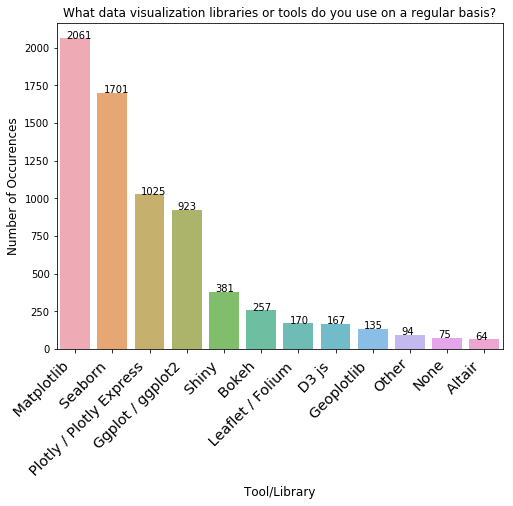

In [229]:
plot_value_counts(viz_tools_count, "What data visualization libraries or tools do you use on a regular basis?",
                 "Tool/Library")

In [230]:
#Which of the following machine learning frameworks do you use on a regular basis?
ml_frameworks_count = pull_columns_of_interest(
    "Which of the following machine learning frameworks do you use on a regular basis?")

Q16_Part_1 =   Scikit-learn 
Q16_Part_2 =   TensorFlow 
Q16_Part_3 =  Keras 
Q16_Part_4 =  PyTorch 
Q16_Part_5 =  Fast.ai 
Q16_Part_6 =  MXNet 
Q16_Part_7 =  Xgboost 
Q16_Part_8 =  LightGBM 
Q16_Part_9 =  CatBoost 
Q16_Part_10 =  Prophet 
Q16_Part_11 =  H2O 3 
Q16_Part_12 =  Caret 
Q16_Part_13 =  Tidymodels 
Q16_Part_14 =  JAX 
Q16_Part_15 = None
Q16_OTHER = Other


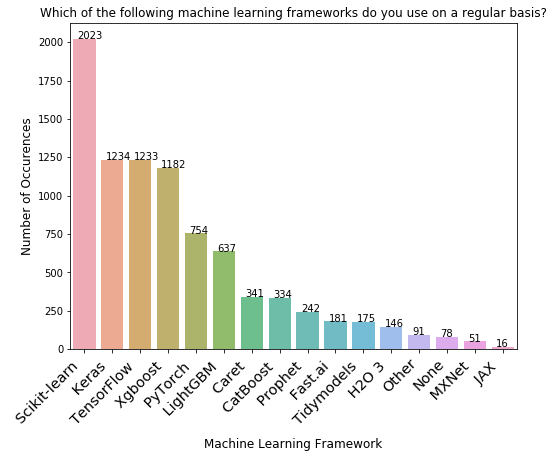

In [231]:
plot_value_counts(ml_frameworks_count, 
                  "Which of the following machine learning frameworks do you use on a regular basis?",
                 "Machine Learning Framework")

In [232]:
# Which of the following ML algorithms do you use on a regular basis?
ml_algo_count = pull_columns_of_interest(
    "Which of the following ML algorithms do you use on a regular basis?")

Q17_Part_1 = Linear or Logistic Regression
Q17_Part_2 = Decision Trees or Random Forests
Q17_Part_3 = Gradient Boosting Machines (xgboost, lightgbm, etc)
Q17_Part_4 = Bayesian Approaches
Q17_Part_5 = Evolutionary Approaches
Q17_Part_6 = Dense Neural Networks (MLPs, etc)
Q17_Part_7 = Convolutional Neural Networks
Q17_Part_8 = Generative Adversarial Networks
Q17_Part_9 = Recurrent Neural Networks
Q17_Part_10 = Transformer Networks (BERT, gpt-3, etc)
Q17_Part_11 = None
Q17_OTHER = Other


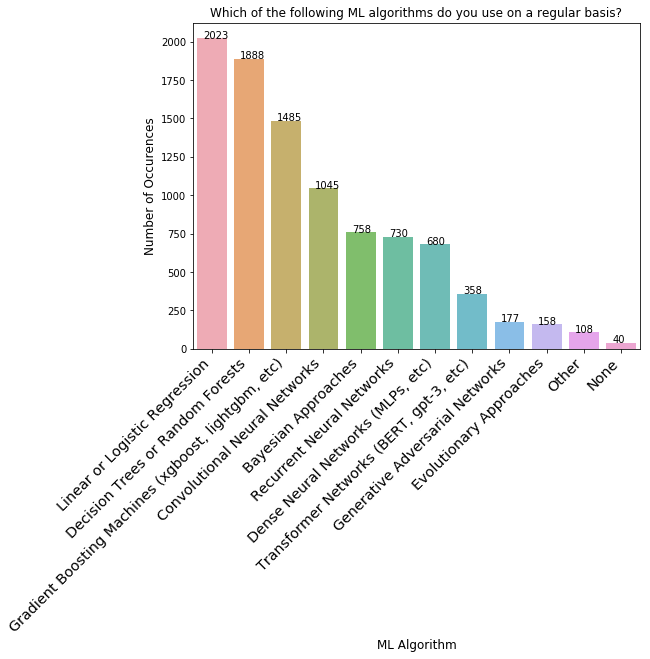

In [233]:
plot_value_counts(ml_algo_count, "Which of the following ML algorithms do you use on a regular basis?",
                 "ML Algorithm")

In [234]:
#Does your current employer incorporate machine learning methods into their business?
employer_ml_count = pull_columns_of_interest(
    "Does your current employer incorporate machine learning methods into their business?")

Q22 = We have well established ML methods (i.e., models in production for more than 2 years)


In [235]:
employer_ml_counts = data_scientists['Q22'].value_counts()
employer_ml_counts

We have well established ML methods (i.e., models in production for more than 2 years)       758
We recently started using ML methods (i.e., models in production for less than 2 years)      588
We are exploring ML methods (and may one day put a model into production)                    432
We use ML methods for generating insights (but do not put working models into production)    323
I do not know                                                                                191
No (we do not use ML methods)                                                                169
Name: Q22, dtype: int64

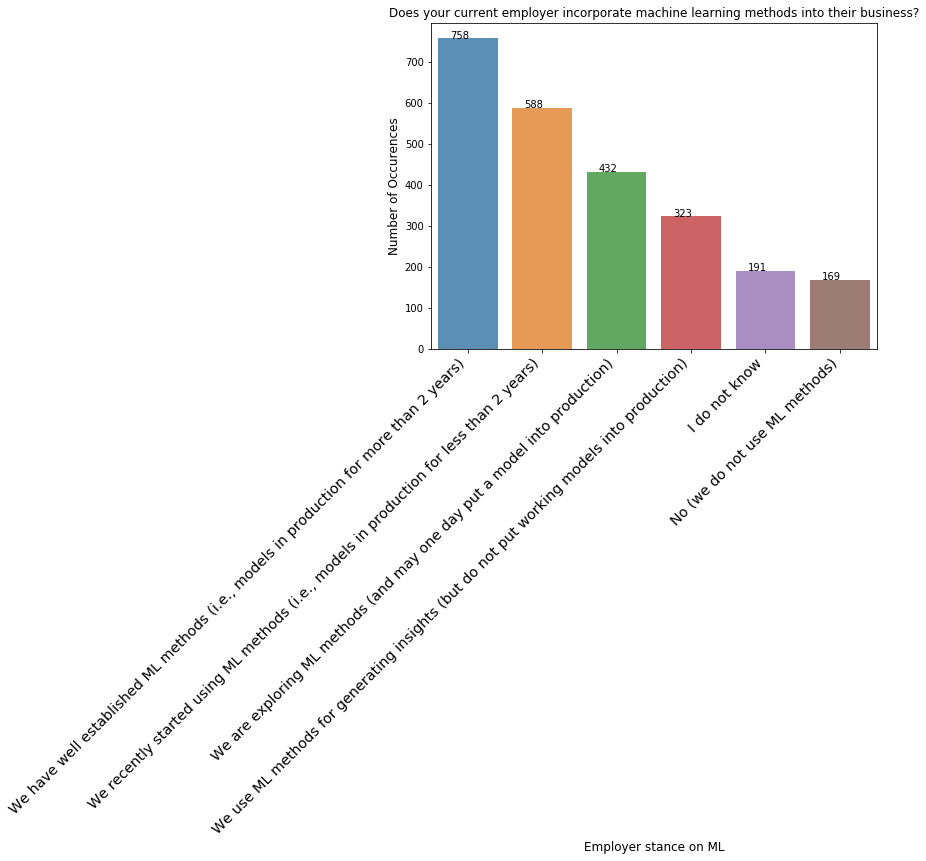

In [236]:
plot_value_counts(employer_ml_counts, 
                  "Does your current employer incorporate machine learning methods into their business?",
                 "Employer stance on ML")

In [237]:
#Do you use any of the following machine learning products on a regular basis?
ml_product_count = pull_columns_of_interest(
    "Do you use any of the following machine learning products on a regular basis?")

Q28_A_Part_1 =  Amazon SageMaker 
Q28_A_Part_2 =  Amazon Forecast 
Q28_A_Part_3 =  Amazon Rekognition 
Q28_A_Part_4 =  Azure Machine Learning Studio 
Q28_A_Part_5 =  Azure Cognitive Services 
Q28_A_Part_6 =  Google Cloud AI Platform / Google Cloud ML Engine
Q28_A_Part_7 =  Google Cloud Video AI 
Q28_A_Part_8 =  Google Cloud Natural Language 
Q28_A_Part_9 =  Google Cloud Vision AI 
Q28_A_Part_10 = No / None
Q28_A_OTHER = Other


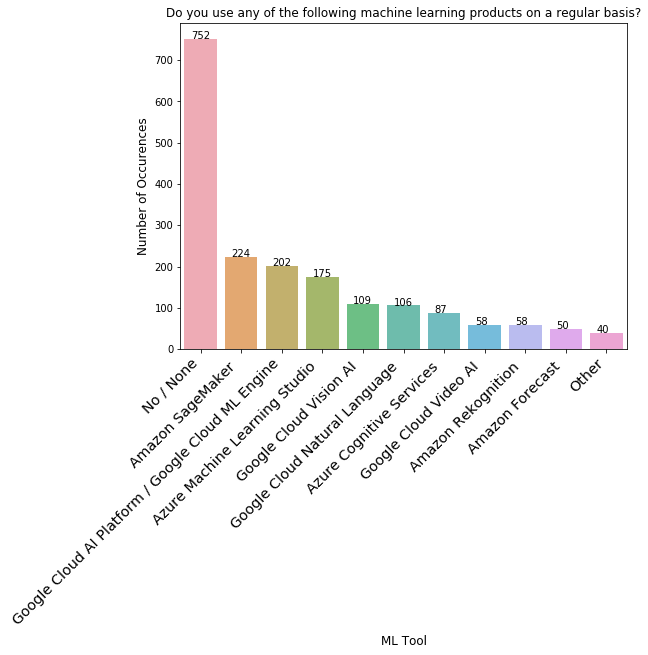

In [238]:
plot_value_counts(ml_product_count, 
                  "Do you use any of the following machine learning products on a regular basis?",
                 "ML Tool")